In [4]:
import warnings; warnings.simplefilter('ignore')
from dcr import *

In [5]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

In [6]:
data, data_train, data_test, X_train_scaled, X_test_scaled, y_train, y_test = dataprep(data)

In [26]:
data = data.sort_values(by=['id', 'time'] )
print(data.loc[(data.id ==9)| (data.id ==47 ), ['id', 'time', 'default_time', 'LTV_orig_time' ,'hpi_time']])

         id  time  default_time  LTV_orig_time  hpi_time
1       9.0  25.0           0.0           80.0    226.29
1845    9.0  26.0           0.0           80.0    225.10
3738    9.0  27.0           0.0           80.0    222.39
5819    9.0  28.0           0.0           80.0    219.67
8080    9.0  29.0           0.0           80.0    217.37
...     ...   ...           ...            ...       ...
23579   9.0  36.0           0.0           80.0    151.48
25316   9.0  37.0           1.0           80.0    153.35
2      47.0  25.0           0.0           80.0    226.29
1846   47.0  26.0           0.0           80.0    225.10
3739   47.0  27.0           0.0           80.0    222.39

[16 rows x 5 columns]


In [1]:
import seaborn as sns

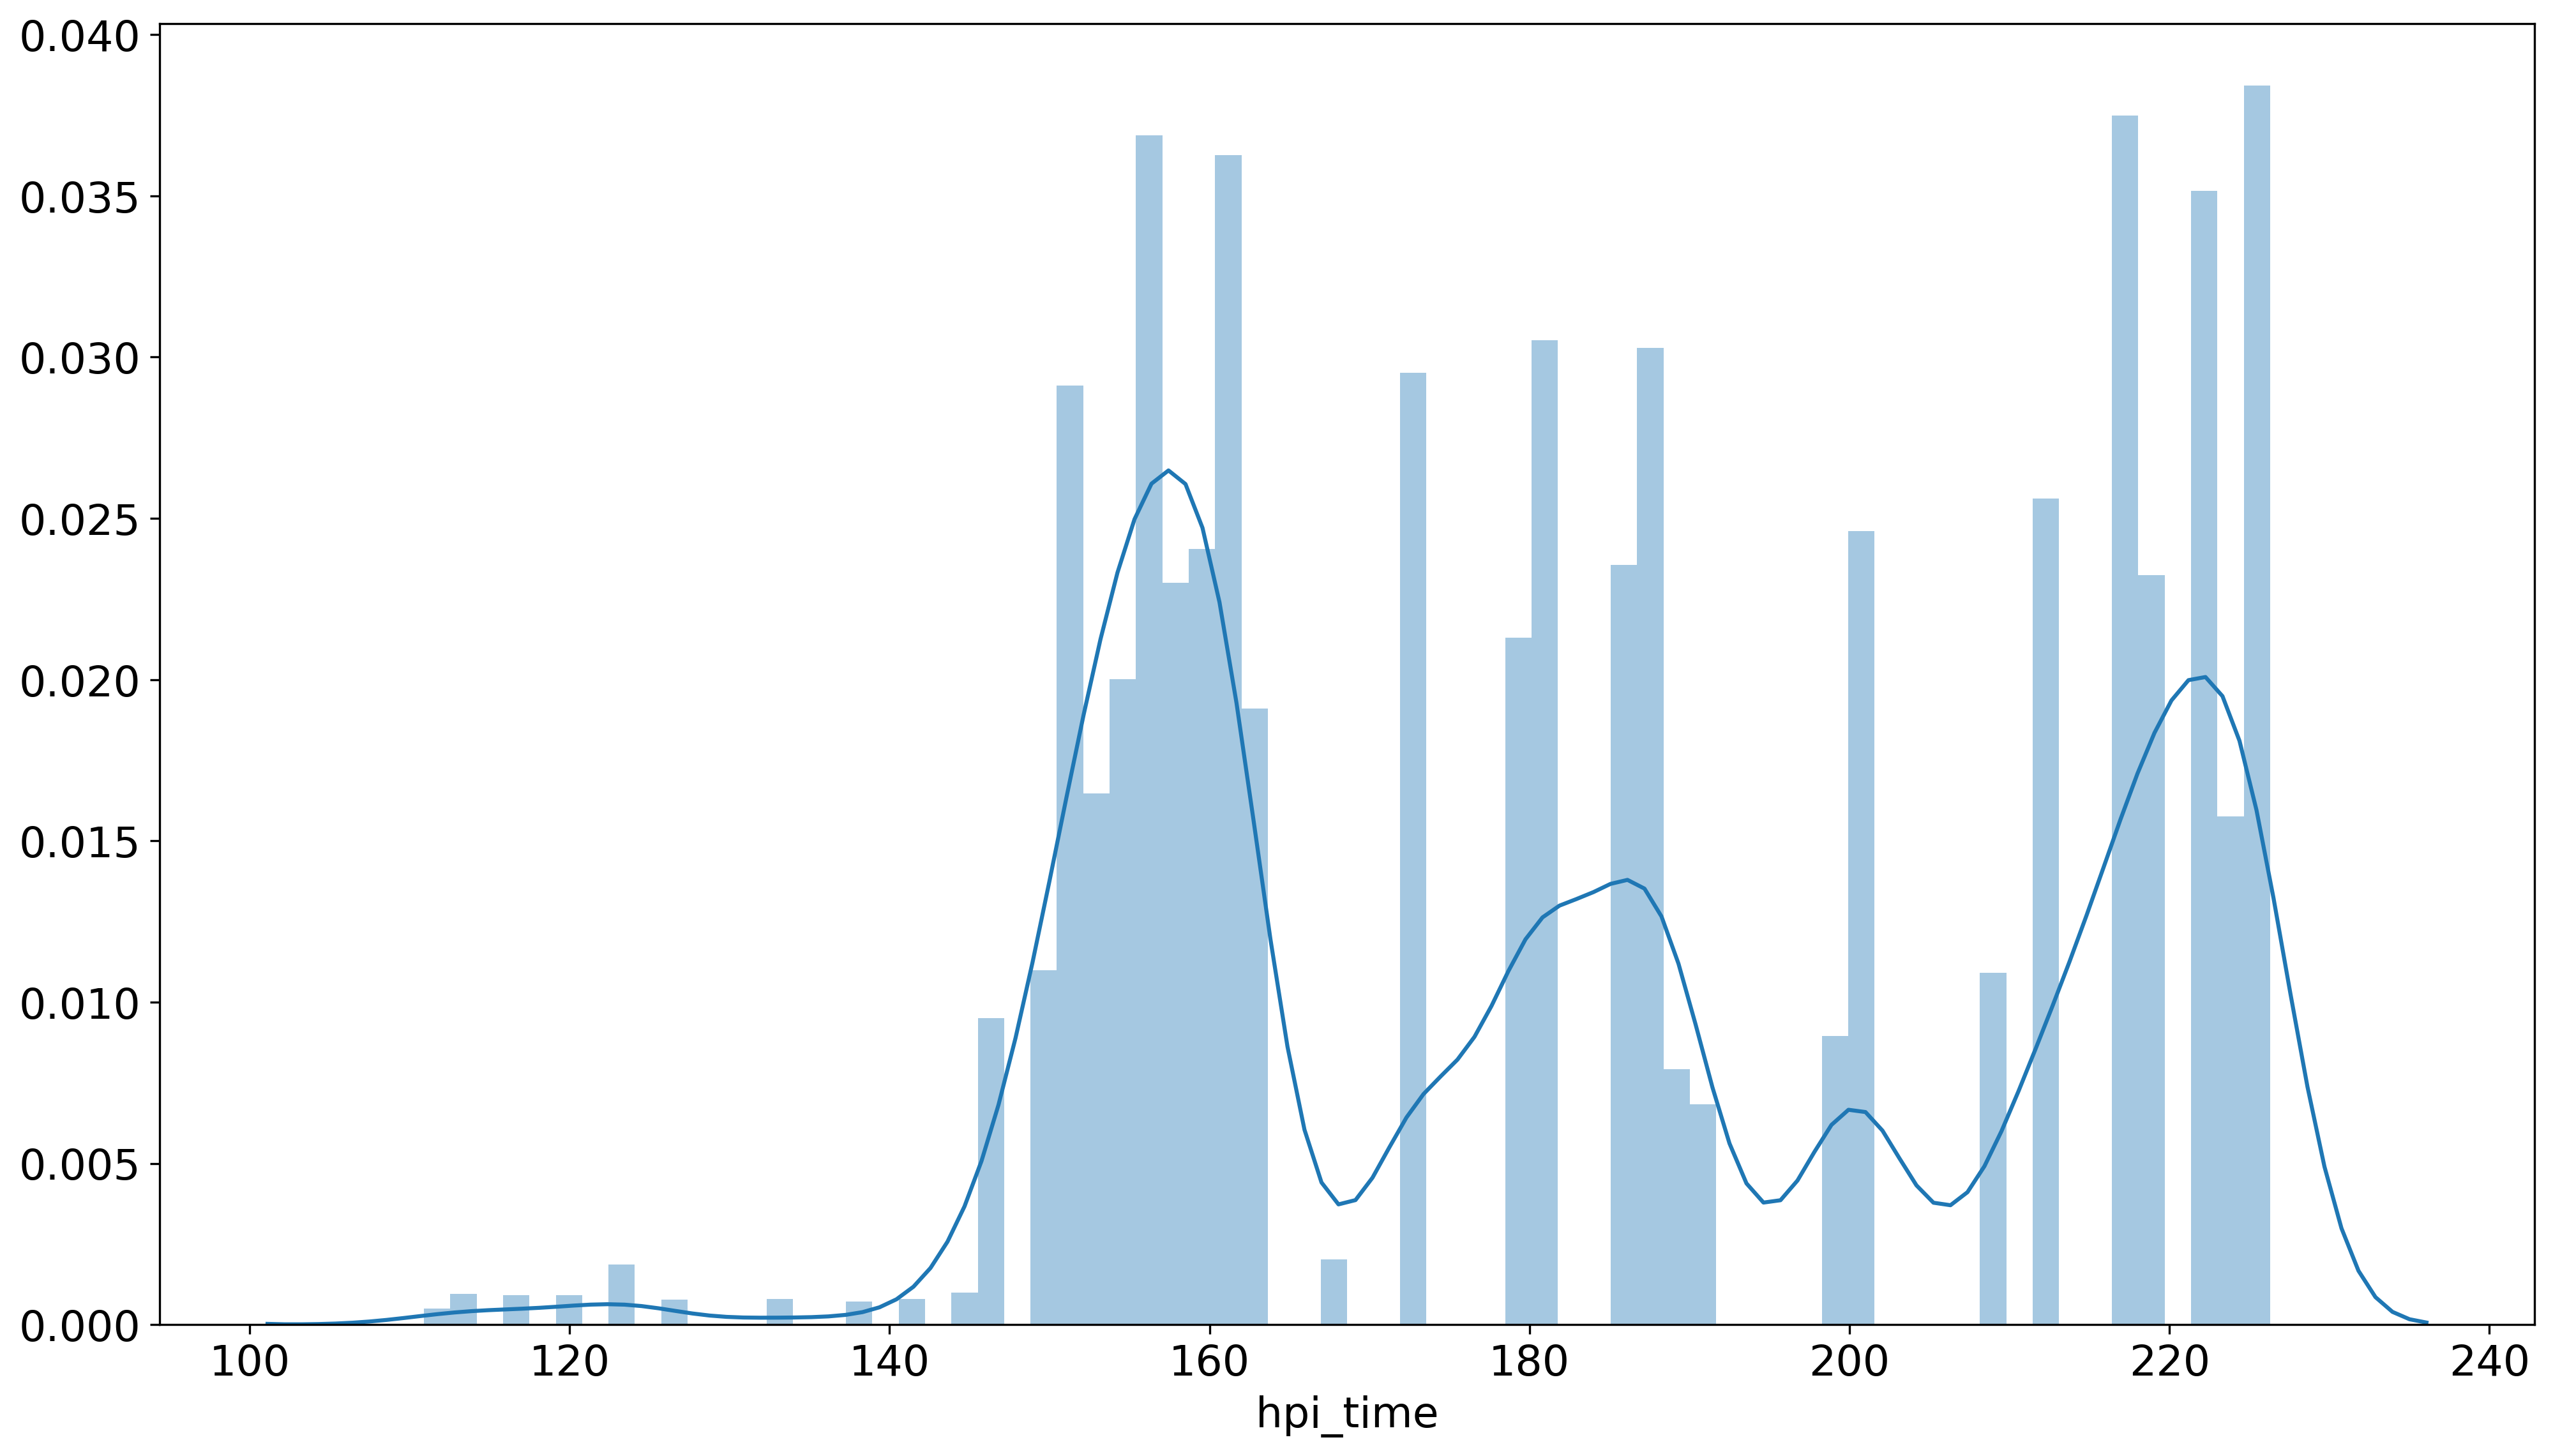

In [19]:
sns.distplot(data['hpi_time'], bins = 70 )

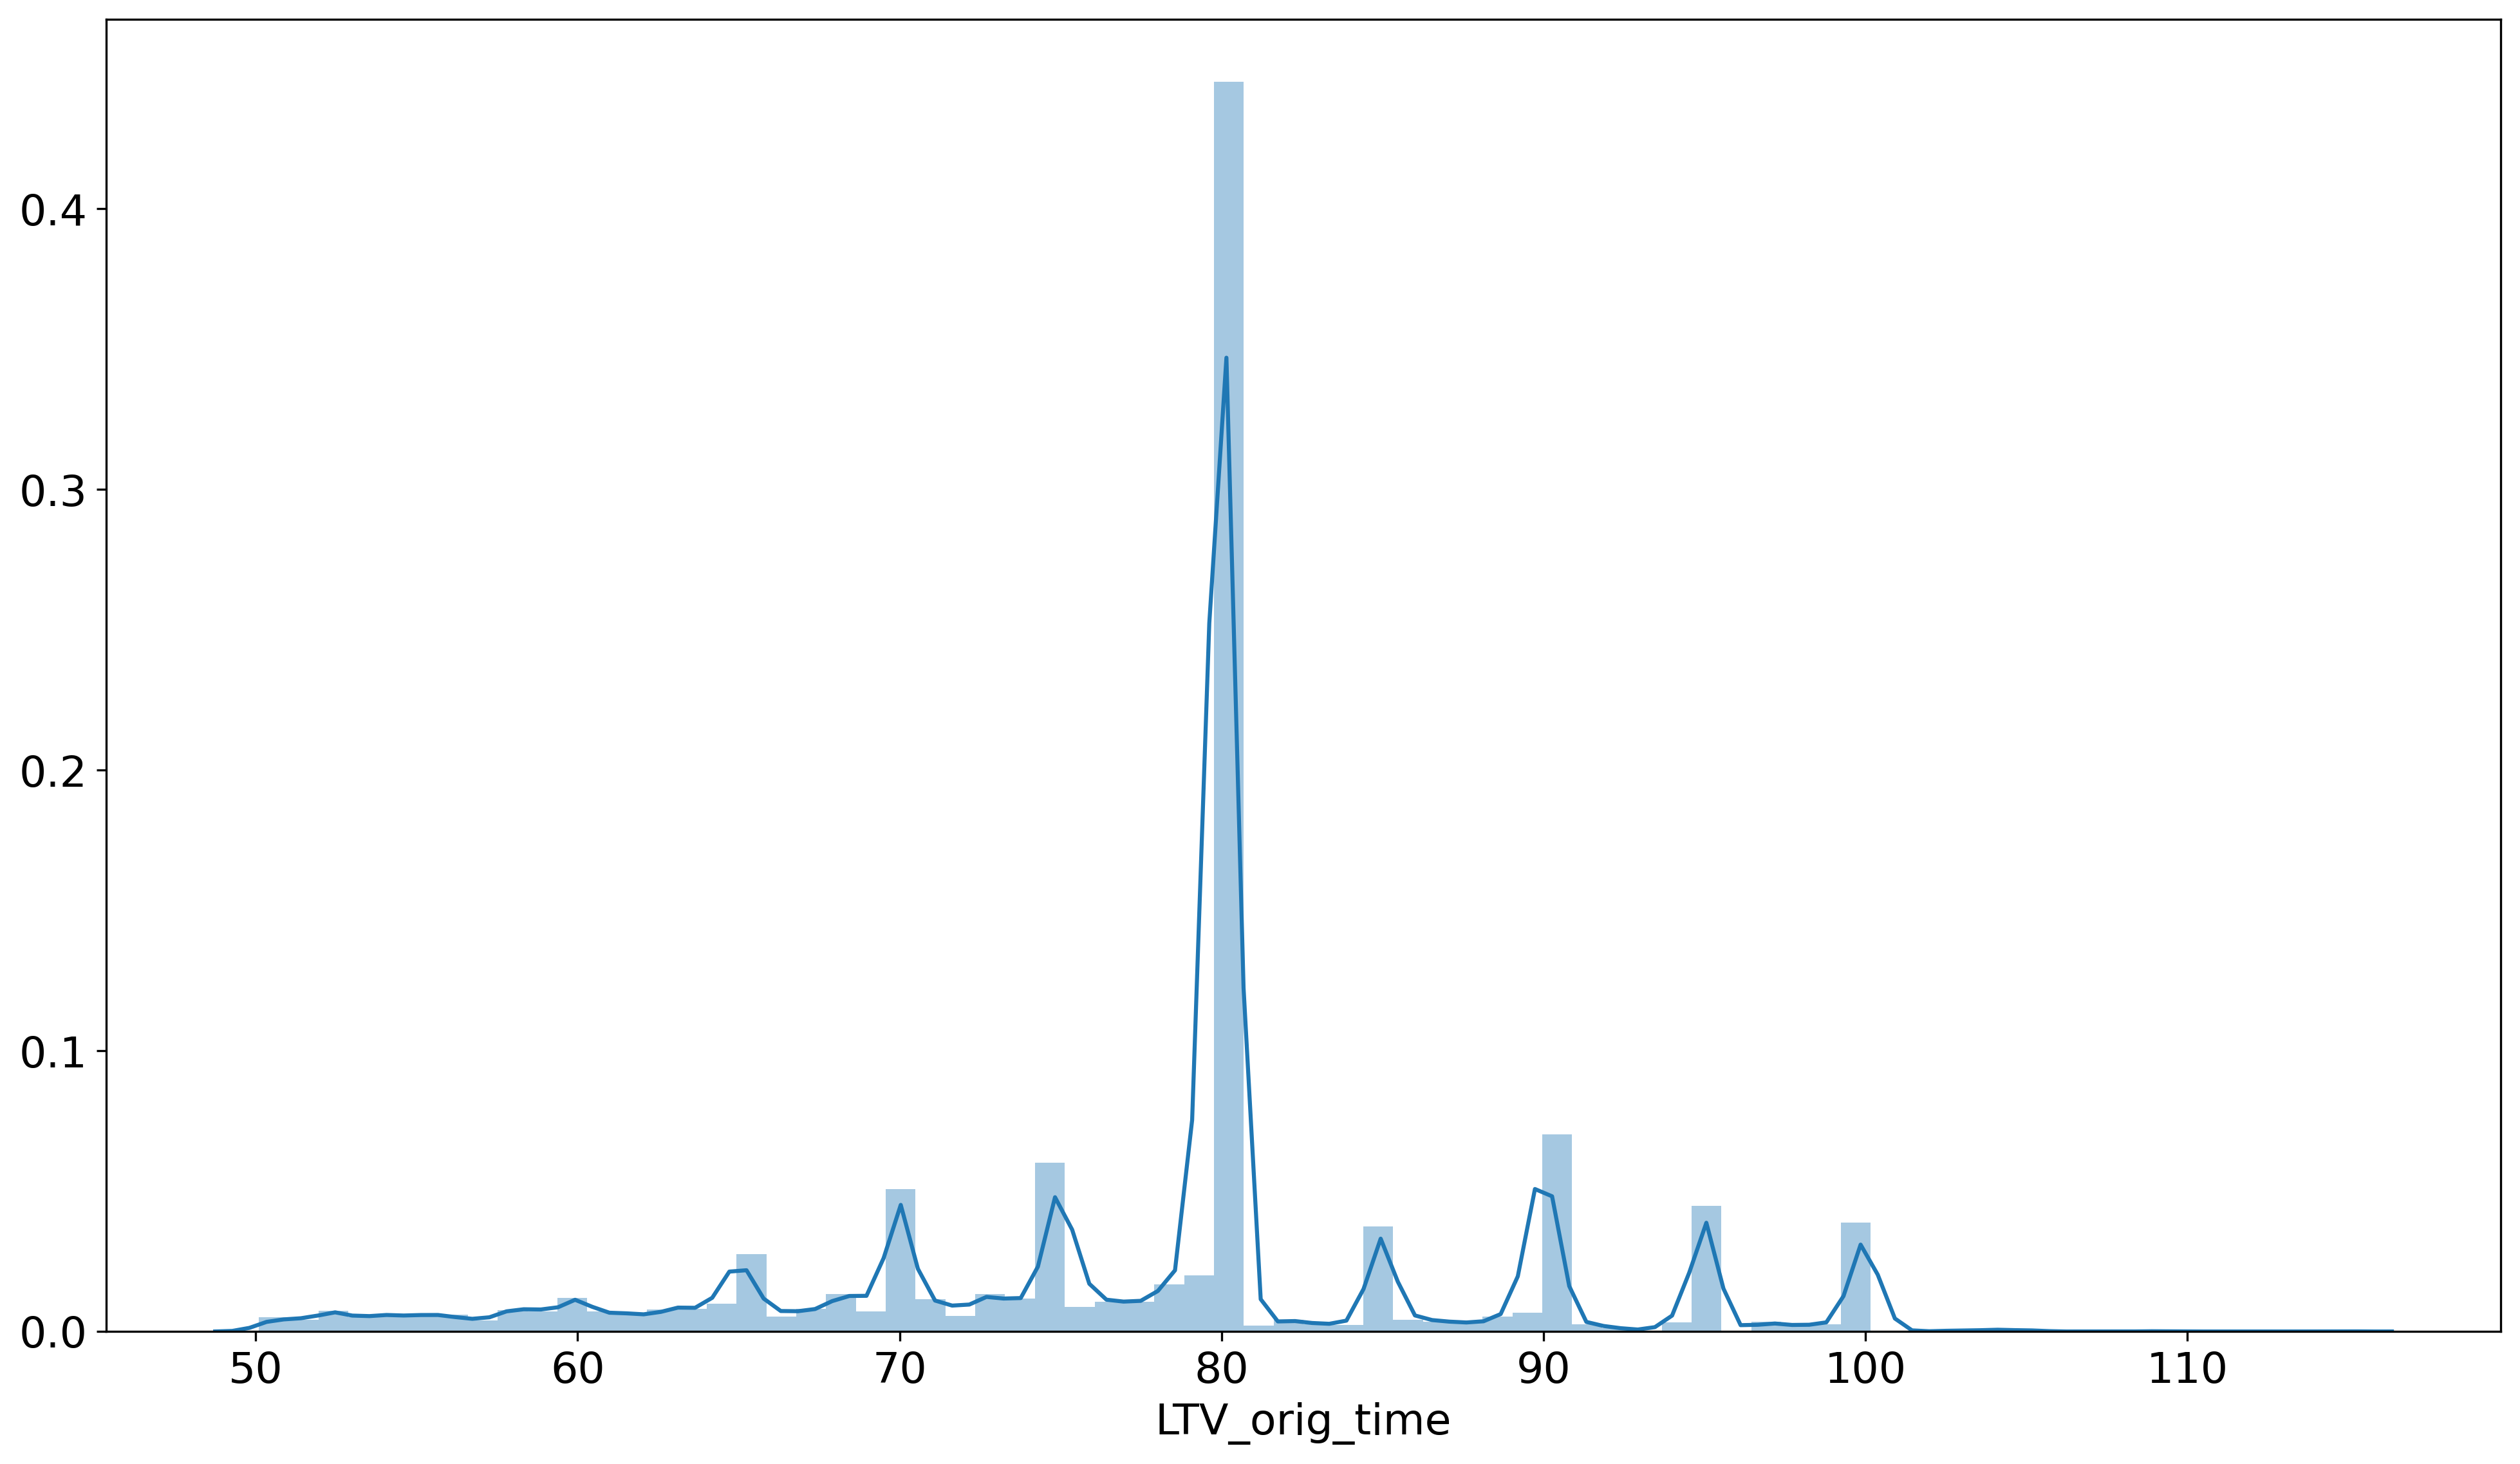

In [30]:
sns.distplot(data['LTV_orig_time'], bins = 70)

In [25]:
model = smf.glm('default_time ~ cep_time + equity_time + interest_rate_time + FICO_orig_time + LTV_orig_time + hpi_orig_time + PCA1_1 + PCA2_1 + PCA3_1 + PCA4_1 + PCA5_1', family = sm.families.Binomial(), data = data).fit()
model.pvalues
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           default_time   No. Observations:                59001
Model:                            GLM   Df Residuals:                    58989
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6404.6
Date:                Thu, 15 Oct 2020   Deviance:                       12809.
Time:                        13:13:58   Pearson chi2:                 5.51e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5038      0